# INFO 498 Final Project

### Train data statistics

YelpNLG: Review Corpus for NLG
 [Curate and Generate: A Corpus and Method for Joint Control of Semantics and Style in Neural NLG](https://aclanthology.org/P19-1596) (Oraby et al., ACL 2019)

In [3]:
# load dataset
import pandas as pd

df_train = pd.read_csv('data/yelpnlg-train.csv')

display(df_train.head())

,id,ref,mr,sentiment,length,first_person,exclamation
0,0,best corn beef and pastrami combo sandwich and...,food||corn_beef||amazing||mention_1 food||past...,positive,len_medium,not_first_person,has_exclamation
1,1,"""he said it did not taste good , and it appear...",food||tomato||canned||mention_1 food||onion||n...,negative,len_long,not_first_person,no_exclamation
2,2,i usually get the dal gal bee chicken dish tha...,food||dal_gal_bee_chicken_dish||no_adj||mentio...,neutral,len_medium,first_person,no_exclamation
3,3,"""the pho was very flavourful , good firm rice ...",food||pho||flavourful||mention_1 food||firm_ri...,positive,len_long,not_first_person,no_exclamation
4,4,"""the spices they use to fry their chicken are ...",food||spices||no_adj||mention_1 food||fry||no_...,positive,len_long,not_first_person,no_exclamation


#### Columns Described

* id - A sequential identifier of the instance in that split.
* ref - The reference text (review sentence) for that instance.
* mr - The meaning representation (mr) for that instance. Each MR is a set of space-separated tuples, and each is tuple
is divided with "||" separators. Each tuple contains the following information (in this order):
    * attribute - one of: {"restaurant", "cuisine", "food", "service", "staff", "ambiance", "price"}
    * value - any value (from attribute lexicons)
    * adjective - any adjective (from sentence dependency parse), else "no_adj" if none is available/retrievable in the parse
    * mention - mention_N (N indicates which mention is being referenced, i.e. 1 for first mention, 2 for second mention, etc.)
* sentiment - "positive" (4-5 stars), "neutral" (3 stars), "negative" (1-2 stars)
* length - "len_short" (4-10 tokens), "len_medium" (10-20 tokens), "len_long" (20-30 tokens)
* first_person - "first_person" (includes a first person pronoun: {"i", "my", "me", "our", "we", "us"}), "not_first_person" (does not include any first person pronouns)
* exclamation - "has_exclamation" (include an exclamation mark), "no_exclamation" (does not include an exclamation mark)

In [5]:
# total reviews
total_reviews = len(df_train)

# total amount of each sentiment
sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}

for sentiment in df_train['sentiment']:
    # check for positive
    if sentiment == 'positive':
        sentiments[sentiment] += 1
    # check for negative
    elif sentiment == 'negative':
        sentiments[sentiment] += 1
    # check for neutral
    elif sentiment == 'neutral':
        sentiments[sentiment] += 1

# total amount of each length of review
total_lengths = {'short': 0, 'medium': 0, 'long': 0}

for length in df_train['length']:
    # check for short
    if length == 'len_short':
        total_lengths['short'] += 1
    # check for medium
    if length == 'len_medium':
        total_lengths['medium'] += 1
    # check for long
    if length == 'len_long':
        total_lengths['long'] += 1

# longest and shortest review
shortest = float('inf')
longest = 0

for review in df_train['ref']:
    review_len = len(review)
    # find shortest
    if review_len < shortest:
        shortest = review_len
    # find longest
    if review_len > longest:
        longest = review_len

# first person/non first person totals
pov_totals = {'first person': 0, 'not first person': 0}

for pov in df_train['first_person']:
    # check for first
    if pov == 'first_person':
        pov_totals['first person'] += 1
    # check for non first
    if pov == 'not_first_person':
        pov_totals['not first person'] += 1

# exclamation vs no exclamation
exclamation_totals = {'exclamation': 0, 'no exclamation': 0}

for exclamation in df_train['exclamation']:
    # check for exclamation
    if exclamation == 'has_exclamation':
        exclamation_totals['exclamation'] += 1
    # check for no exclamation
    if exclamation == 'no_exclamation':
        exclamation_totals['no exclamation'] += 1

# print review total
print('total reviews:', total_reviews)
print()

# print sentiment totals
print('total sentiments:', sentiments)
print()

# print review lengths
print('total lengths:', total_lengths)
print('shortest review by tokens:', shortest)
print('longest review by tokens:', longest)
print()

# print pov totals
print("total pov's:", pov_totals)
print()

# print exclamation totals
print('total exclamations:', exclamation_totals)

total reviews: 235426

total sentiments: {'positive': 146760, 'negative': 48372, 'neutral': 40294}

total lengths: {'short': 22054, 'medium': 116972, 'long': 96400}
shortest review by tokens: 15
longest review by tokens: 245

total pov's: {'first person': 118552, 'not first person': 116874}

total exclamations: {'exclamation': 19244, 'no exclamation': 216181}


## Sentiment Analysis (Yelp corpus)
### Logistic Regression on TF-IDF 

#### Train split

In [7]:
# remove neutral instances
df_train = df_train[df_train.sentiment != 'neutral']

# print number of instances per sentiment
df_train.sentiment.value_counts()

sentiment
positive    146760
negative     48372
Name: count, dtype: int64

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the tf-idf vectorizer to convert all texts into weighted vectors

# fit vectorizer on training data
tfidf_vectorizer = TfidfVectorizer()
train_tfidf_vectors = tfidf_vectorizer.fit_transform(df_train.ref)
print(train_tfidf_vectors.shape)
print(train_tfidf_vectors[0]) 

(195132, 28529)
  (0, 2607)	0.2904350525282116
  (0, 6133)	0.33553699202660175
  (0, 2442)	0.15885889934521094
  (0, 1267)	0.17441650614580462
  (0, 18287)	0.4336225600051432
  (0, 5673)	0.32772989453655493
  (0, 21688)	0.24482054633881892
  (0, 25457)	0.0824516487551533
  (0, 5391)	0.4283067741997713
  (0, 12789)	0.1861706339206054
  (0, 1163)	0.2870923735643336
  (0, 25912)	0.29104317273961317


In [9]:
# convert the labels into 1s (positive sentiment) and 0s (negative sentiment)

labels = df_train.sentiment
labels_binary = [1 if l == 'positive' else 0 for l in labels]

print(labels_binary[:10])

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
# training logistic regression classifier on train data vectors

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr_tfidf = LogisticRegression(max_iter=500)
lr_tfidf.fit(train_tfidf_vectors, labels_binary)

labels_tfidf_predicted_train = lr_tfidf.predict(train_tfidf_vectors)

# compute precision, recall, accuracy, f1 

precision = precision_score(labels_binary, labels_tfidf_predicted_train)
recall = recall_score(labels_binary, labels_tfidf_predicted_train)
accuracy = accuracy_score(labels_binary, labels_tfidf_predicted_train)
f1 = f1_score(labels_binary, labels_tfidf_predicted_train)

print("Tfidf vectors (train split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision, recall, accuracy, f1))

Tfidf vectors (train split) P/R/A/F1: 0.865, 0.953, 0.853, 0.907


#### Test split

In [12]:
df_test = pd.read_csv('data/yelpnlg-test.csv')
df_test.head(3)

,id,ref,mr,sentiment,length,first_person,exclamation
0,0,we finally received the chicken and bread afte...,food||chicken||no_adj||mention_1 food||bread||...,negative,len_medium,first_person,no_exclamation
1,1,"""on my second visit , i tried the beef okonomi...",food||beef_okonomiyaki||no_adj||mention_1 food...,positive,len_long,first_person,no_exclamation
2,2,"""chicken soup with a thigh of chicken and big ...",food||chicken_soup||no_adj||mention_1 food||ch...,positive,len_long,not_first_person,has_exclamation


In [13]:
# remove neutral instances
df_test = df_test[df_test.sentiment != 'neutral']

# print number of instances per sentiment
df_test.sentiment.value_counts()

sentiment
positive    18233
negative     6059
Name: count, dtype: int64

In [14]:
# fit test data using train vectorizer

test_tfidf_vectors = tfidf_vectorizer.transform(df_test['ref'])

# convert the labels into 1s (positive sentiment) and 0s (negative sentiment)

labels_test = df_test.sentiment
labels_binary_test = [1 if l == 'positive' else 0 for l in labels_test]

print(labels_binary_test[:10])

[0, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [15]:
# predict on test data

labels_tfidf_predicted_test = lr_tfidf.predict(test_tfidf_vectors)

# compute precision, recall, accuracy, f1

precision_test = precision_score(labels_binary_test, labels_tfidf_predicted_test)
recall_test = recall_score(labels_binary_test, labels_tfidf_predicted_test)
accuracy_test = accuracy_score(labels_binary_test, labels_tfidf_predicted_test)
f1_test = f1_score(labels_binary_test, labels_tfidf_predicted_test)

print("Tfidf vectors (test split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision_test, recall_test, accuracy_test, f1_test))

Tfidf vectors (test split) P/R/A/F1: 0.859, 0.945, 0.842, 0.900


In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_binary_test, labels_tfidf_predicted_test, labels=[1, 0]) 
print(cm)

[[17236   997]
 [ 2832  3227]]


In [17]:
print("Tfidf vectors (train split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision, recall, accuracy, f1))
print("Tfidf vectors (test split) P/R/A/F1: {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(precision_test, recall_test, accuracy_test, f1_test))

Tfidf vectors (train split) P/R/A/F1: 0.865, 0.953, 0.853, 0.907
Tfidf vectors (test split) P/R/A/F1: 0.859, 0.945, 0.842, 0.900


Analysis

The performance on the training set is slightly better than the test set. The slight drop in performance on the test split suggests that the model is not overfitting very much. Both the train and test models have good precision (high rate of predicting positive correctly). Both models also have very high recall scores, meaning the models are effective in identifying all actual true positive cases. The high F1 score for each model shows a good balance of precision and recall. The decently high accuracy for each model suggests that the model is effectively classifying the sentiment.

## Yelp Business and Reviews

### Cleaning and combining datasets

In [21]:
# load business and review datasets
df_yelp_business = pd.read_csv('data/yelp_business.csv')
df_yelp_review = pd.read_csv('data/yelp_review.csv')

In [22]:
df_yelp_business.head(3)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...


In [23]:
df_yelp_business.shape

(174567, 13)

In [24]:
df_yelp_review.head(3)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0


In [25]:
df_yelp_review.shape

(5261668, 9)

In [26]:
# combine datasets based on the business_id
df_combined = pd.merge(df_yelp_review, df_yelp_business, on='business_id', how='inner')
df_combined.head(3)

,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,address,city,state,postal_code,latitude,longitude,stars_y,review_count,is_open,categories
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,"""Wilensky's""",...,"""34 Avenue Fairmount Ouest""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84,1,Diners;Food;Restaurants;Delis
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,"""Tuck Shop""",...,"""4662 Rue Notre-Dame O""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50,1,Restaurants;Canadian (New);Italian
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,"""Lester's Deli""",...,"""1057 Avenue Bernard""",Outremont,QC,H2V 1V1,45.522144,-73.607076,4.0,70,1,Specialty Food;Food;Sandwiches;Restaurants;Bur...


In [27]:
df_combined.shape

(5261668, 21)

In [28]:
# remove unnecessary columns

columns_to_remove = ['user_id', 'useful', 'funny', 'cool', 'address', 'is_open', 'categories', 'neighborhood']
df_cleaned = df_combined.drop(columns=columns_to_remove)
df_cleaned.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count
0,vkVSCC7xljjrAI4UGfnKEQ,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,"""Wilensky's""",Montréal,QC,H2T 2M1,45.523333,-73.594859,4.0,84
1,n6QzIUObkYshz4dz2QRJTw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,"""Tuck Shop""",Montréal,QC,H4C 1S7,45.472902,-73.588321,4.5,50
2,MV3CcKScW05u5LVfF6ok0g,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,"""Lester's Deli""",Outremont,QC,H2V 1V1,45.522144,-73.607076,4.0,70


In [29]:
# randomly sample data to reduce size

sample_fraction = 0.01 
df_sampled = df_cleaned.sample(frac=sample_fraction, random_state=1)

# should be over 50,000 samples
df_sampled.shape

(52617, 13)

### Applying TF-IDF Vectorizer

In [60]:
# preprocessing text data

# convert to lowercase
df_sampled['text'] = df_sampled['text'].str.lower() 

# remove punctuation
df_sampled['text'] = df_sampled['text'].str.replace(r'[^\w\s]', '', regex=True)

df_sampled.head(3)

,review_id,business_id,stars_x,date,text,name,city,state,postal_code,latitude,longitude,stars_y,review_count
3931331,I6xTlLkMn2fQV0H46O25uQ,LiSt3sVWELm7nfVIKJs0MA,2,2017-08-02,my office is close so we have been there a few...,"""Parasson's Italian Restaurants""",Stow,OH,44224,41.173316,-81.439726,3.0,41
3004306,1FJPW9lB3rvw_2fEgrxjyg,6aDfalYZOkWzwtVRA2wYaA,4,2014-01-30,good food great naan fair prices it is a hole ...,"""Z-Grill""",Phoenix,AZ,85008,33.466978,-111.995925,4.5,21
1522757,BVMQPEUd-xqxCYEA44KVYQ,L2iT7pipc455Tgpbo35_mw,2,2017-05-22,casa was once one of my favorite places in all...,"""CASA Sunbá""",Tempe,AZ,85281,33.424337,-111.939422,3.0,220


In [66]:
# vectorize text data using fitted TF-IDF vectorizer
sample_tfidf_vectors = tfidf_vectorizer.transform(df_sampled['text'])


# predict sentiment labels
predicted_labels = lr_tfidf.predict(sample_tfidf_vectors)
predicted_labels

array([0, 1, 0, ..., 1, 1, 1])

In [74]:
# store predictions in the DF 
df_sampled['predicted_sentiment'] = ['positive' if label == 1 else 'negative' for label in predicted_labels]

print(df_sampled[['text', 'predicted_sentiment']].head(10))

                                                      text predicted_sentiment
3931331  my office is close so we have been there a few...            negative
3004306  good food great naan fair prices it is a hole ...            positive
1522757  casa was once one of my favorite places in all...            negative
4393846  nothing comes close to this place if you enjoy...            positive
895309   really enjoyed going here for dinner  i had fi...            positive
4945819  love this place the margaritas are really good...            positive
4667888  delicious dates wrapped with bacon i love thei...            positive
3101461  this sylist literally thought rubbing my hair ...            negative
646928   i would never stay here by choice  it was one ...            negative
3368693  love dr weisner and his staff i have a little ...            positive


### Further Analysis

In [100]:
# map star ratings to sentiment labels
def map_stars_to_sentiment(stars):
    if stars >= 3:
        return 'positive'
    elif stars <= 2:
        return 'negative'

# create a new column for true sentiment
df_sampled['true_sentiment'] = df_sampled['stars_x'].apply(map_stars_to_sentiment)

print(df_sampled[['stars_x', 'true_sentiment']].head(10))

         stars_x true_sentiment
3931331        2       negative
3004306        4       positive
1522757        2       negative
4393846        5       positive
895309         4       positive
4945819        5       positive
4667888        4       positive
3101461        2       negative
646928         2       negative
3368693        5       positive


Confusion Matrix:
 [[37096  3942]
 [ 2272  9307]]


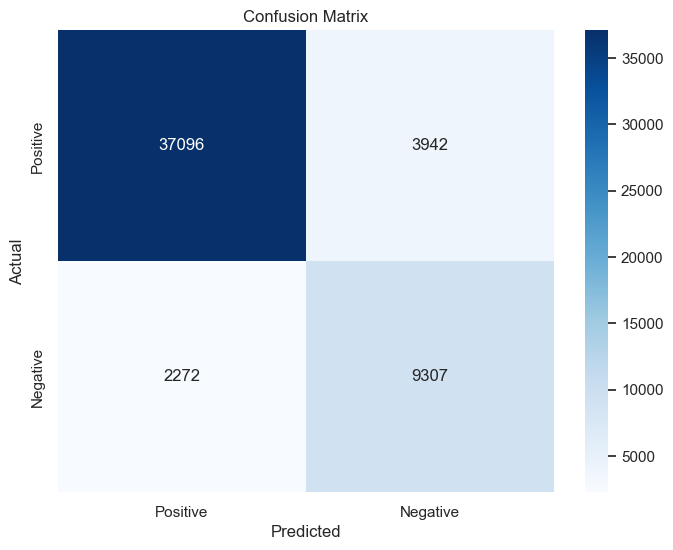

In [109]:
from sklearn.metrics import classification_report

# calculate confusion matrix
cm = confusion_matrix(df_sampled['true_sentiment'], df_sampled['predicted_sentiment'], labels=['positive', 'negative'])
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [111]:
# classification report
print(classification_report(df_sampled['true_sentiment'], df_sampled['predicted_sentiment']))

              precision    recall  f1-score   support

    negative       0.70      0.80      0.75     11579
    positive       0.94      0.90      0.92     41038

    accuracy                           0.88     52617
   macro avg       0.82      0.85      0.84     52617
weighted avg       0.89      0.88      0.88     52617



This model performs very well for positive reviews with high precision, recall, and F1-scores. It's a really useful model if someone is trying to identify positive reviews across different domains. The performance for the negative class is a bit lower with a precision of only 70% and an F1-score of 75%. This may be due to the random sampling and class weighting for the data or how I chose to classify the star ratings as either positive or negative. 